(array([1., 0., 2., 5., 2., 2., 0., 3., 4., 1.]),
 array([-25.69603324, -21.5115977 , -17.32716216, -13.14272663,
         -8.95829109,  -4.77385555,  -0.58942001,   3.59501552,
          7.77945106,  11.9638866 ,  16.14832214]),
 <BarContainer object of 10 artists>)

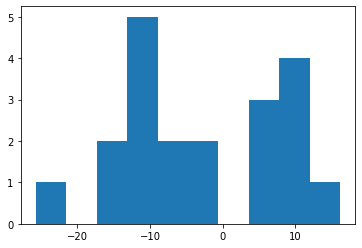

In [7]:
#Пример
import numpy as np 
import matplotlib.pyplot as plt

noise = np.random.randn(20)*10
plt.hist(noise)

In [8]:
X = np.linspace(-5,5,20)
y = 10*X - 7 +noise 
X = X.reshape(-1,1)
X.shape

(20, 1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'sactter'

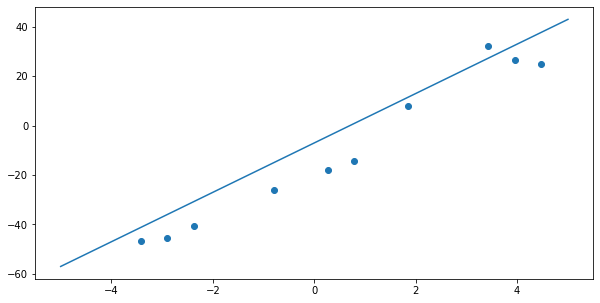

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.5)
plt.figure(figsize=(10, 5))
plt.plot(X, 10*X - 7, label='real')
plt.scatter(X_train,y_train,label='train')
plt.sactter(X_test,y_test, label='test')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

w = model.coef_[0]
b = model.predict(np.zeros((1,1)))[0]
w,b

(10.497657035563627, -15.544579613094285)

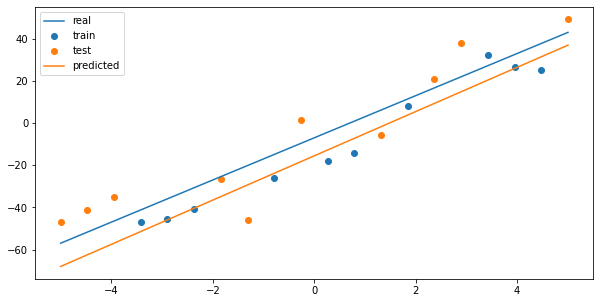

In [11]:
plt.figure(figsize=(10,5))
plt.plot(X,10*X-7, label='real')
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(X,X*w+b,label='predicted')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE:', mean_squared_error(y_train,y_train_predicted))
print('Test MAE:', mean_absolute_error(y_test,y_test_predicted))

Train MSE: 30.122233749188105
Test MAE: 15.998940486320777


(array([1., 0., 0., 2., 4., 9., 7., 3., 3., 1.]),
 array([-65.02968831, -54.52956219, -44.02943608, -33.52930996,
        -23.02918384, -12.52905773,  -2.02893161,   8.47119451,
         18.97132063,  29.47144674,  39.97157286]),
 <BarContainer object of 10 artists>)

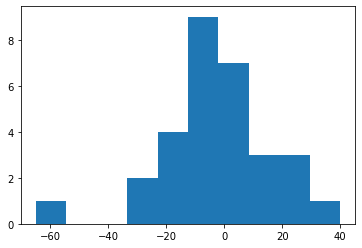

In [13]:
#Задание 1
import numpy as np 
import matplotlib.pyplot as plt

noise = np.random.randn(30)*20
plt.hist(noise)

In [14]:
X = np.linspace(-20,20,30)
y = X**2 + X - 55 +noise 
X = X.reshape(-1,1)
X.shape

(30, 1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'sactter'

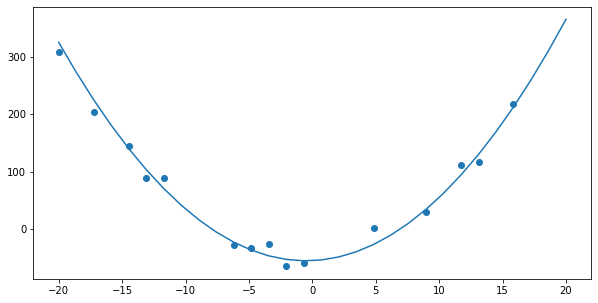

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.5)
plt.figure(figsize=(10, 5))
plt.plot(X, X**2 + X - 55, label='real')
plt.scatter(X_train,y_train,label='train')
plt.sactter(X_test,y_test, label='test')
plt.legend()
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

w = model.coef_[0]
b = model.predict(np.zeros((1,1)))[0]
w,b

(-2.118625936481584, 67.75486909563556)

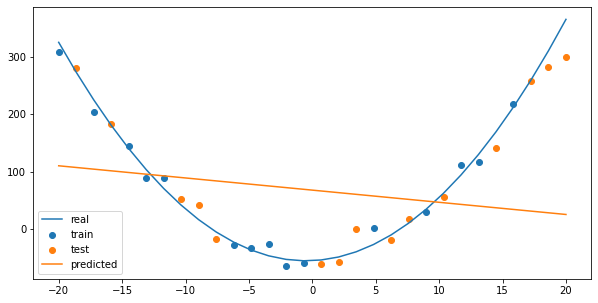

In [17]:
plt.figure(figsize=(10,5))
plt.plot(X, X**2 + X - 55, label='real')
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(X,X*w+b,label='predicted')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE:', mean_squared_error(y_train,y_train_predicted))
print('Test MAE:', mean_absolute_error(y_test,y_test_predicted))

Train MSE: 11233.464599246658
Test MAE: 114.73592705782399


In [ ]:
#задание 2 
#1) Пациенты в больнице. В этом случае устанавлевается зависимость между симптомами и болезнью
#2)Статьи УК РФ и преступления. В этом случае устанавлевается зависимость между преступлениями и статьями
#3)Рекламные посты. Часто замечаю, что после того, как искал какой-то товар в интернете, сразуже вещде появляются рекламные посты
#с такими же или очень похожими товарами. Не знаю, на сколкьо это правда. Но если это верно, тогда строиться зависимость между
#поисковыми запросами и самой рекламой.

# Постановка задачи


Мы имеем данные стоимости дома и количество комнат. Нужно установить зависимость стоимость дома от количества комнат и обучить алгоритм для приблизительной оценки стоимости жилых домов.

In [29]:
import pandas as pd
salary = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/main/california_housing.csv")

salary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [31]:
my_dataset = salary.rename(columns={"total_rooms": "x","median_house_value": "y"},inplace=False)

my_dataset

,longitude,latitude,housing_median_age,x,total_bedrooms,population,households,median_income,ocean_proximity,y
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [32]:
print(my_dataset.shape)

my_dataset.describe()

(20640, 10)


,longitude,latitude,housing_median_age,x,total_bedrooms,population,households,median_income,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
x = my_dataset[["x"]]
y = my_dataset["y"]

(array([2., 1., 8., 6., 8., 8., 5., 6., 5., 1.]),
 array([-0.48248672, -0.37794118, -0.27339565, -0.16885011, -0.06430458,
         0.04024096,  0.1447865 ,  0.24933203,  0.35387757,  0.4584231 ,
         0.56296864]),
 <BarContainer object of 10 artists>)

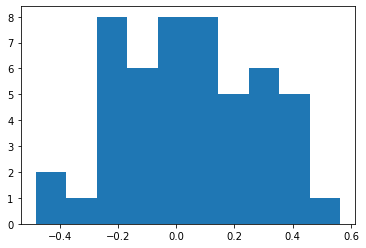

In [34]:
my_noise = np.random.randn(50) * 0.25
plt.hist(my_noise)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=31)
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [36]:
print(f"{model.intercept_}\n{model.coef_}")

188152.5972523
[7.09526954]


In [37]:
coefficient_dataframe = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])

coefficient_dataframe

,Coefficient
x,7.09527


In [38]:
y_predicted = model.predict(x_test)
my_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_predicted})

my_dataframe


,Actual,Predicted
9264,62300,197262.923336
8172,251400,197071.351059
7176,126500,211368.319174
3067,56500,199632.743361
18341,500001,197568.019927
15774,450000,198490.404966
3269,140600,192984.475806
12741,159500,203698.332806
7736,195800,200874.415530
7410,154000,201555.561406


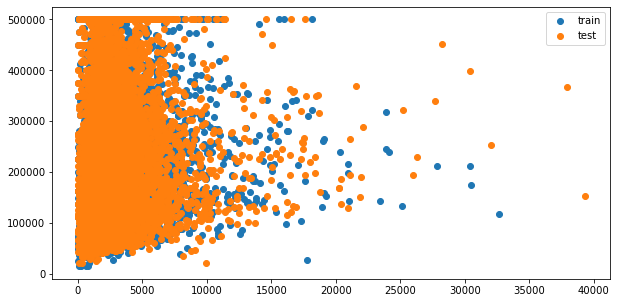

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5)
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.legend()
plt.show()

In [40]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

print(f"Train MSE: {mean_squared_error(y_train, y_train_predicted)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_predicted)}")
                                                       

Train MSE: 13088042353.03294
Test MSE: 13063683901.451462


In [41]:
print(f"Train MAE: {mean_absolute_error(y_train, y_train_predicted)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_predicted)}")

Train MAE: 89985.87194255681
Test MAE: 89876.9079245817
